In [1]:
import pandas as pd

In [2]:
import yfinance as yf
import datetime as dt

start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'  # Stock symbol in uppercase

stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]

In [4]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [5]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [6]:
column="Close"

In [7]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [8]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

114
X_train length: (114, 1)
X_test length: (29, 1)
y_train length: (114, 1)
y_test length: (29, 1)


In [14]:
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
best_scores = {'RMSE': float('inf'), 'MAPE': float('inf')}
##float('inf') represents positive infinity. It's a way to represent an infinitely large number
best_orders = {'RMSE': None, 'MAPE': None}
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    print(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmse_Test,maPe_Test=rmsemape(y_test,y_pred)
    #Checks the rmse value for the first order is lower or not, if lower the current value will be stored
    #same process for all the orders
    #best_score(lower value) will be updated
    if rmse_Test < best_scores['RMSE']:
        best_scores['RMSE'] = rmse_Test
        best_orders['RMSE'] = i
    #Checks the mape value for the first order is lower or not, if lower the current value will be stored
    #same process for all the orders    
    if maPe_Test < best_scores['MAPE']:
        best_scores['MAPE'] = maPe_Test
        best_orders['MAPE'] = i
#the best order on both the evaluation metric will be printed        
print(f"\nBest order based on RMSE: {best_orders['RMSE']} with a score of {best_scores['RMSE']}")
print(f"\nBest order based on MAPE: {best_orders['MAPE']} with a score of {best_scores['MAPE']}")

(1, 0, 2)
0.06581027706194759
0.22241410514773813
(1, 0, 1)
0.06556700124080597
0.22359971047656693
(2, 0, 1)
0.06565107494826193
0.22323284600287024
(1, 0, 1)
0.06556700124080597
0.22359971047656693

Best order based on RMSE: (1, 0, 1) with a score of 0.06556700124080597

Best order based on MAPE: (1, 0, 2) with a score of 0.22241410514773813


In [16]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=best_orders['RMSE'])
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from stockFunctions import rmsemape
rmsemape(y_test,y_pred)          

0.06556700124080597
0.22359971047656693


(0.06556700124080597, 0.22359971047656693)

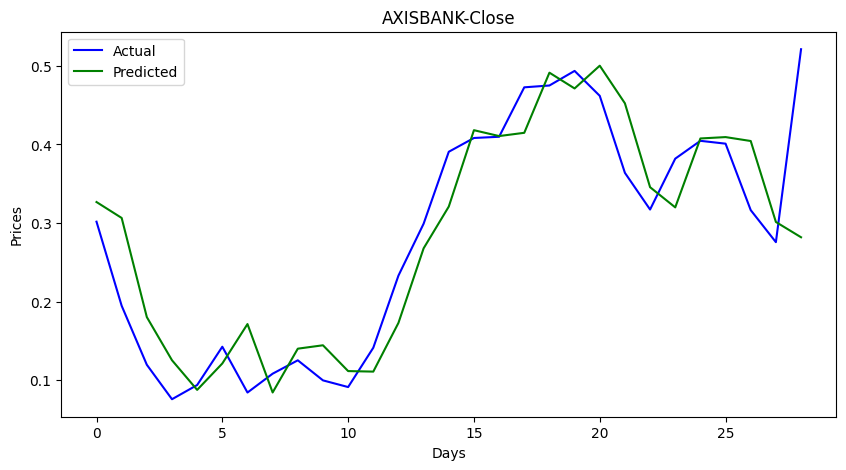

In [18]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","AXISBANK-Close","Days","Prices")

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [21]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

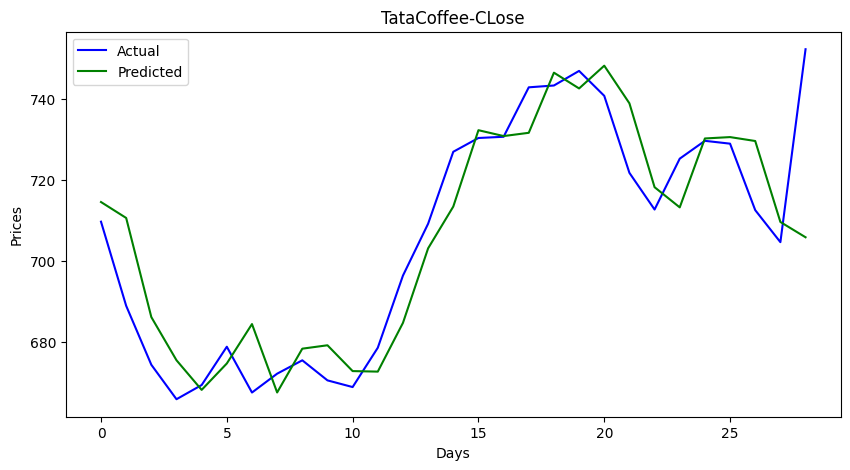

In [22]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLose","Days","Prices")

In [23]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [24]:
forecast

array([0.59101123, 0.584706  , 0.57880527, 0.57328309])

In [25]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [26]:
forecast_stock_price_test_oriF.to_csv("CloseAxis.csv",index=False)

In [27]:
forecast_stock_price_test_oriF

,Closefore
0,765.756155
1,764.53294
2,763.388198
3,762.316894
